In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report, accuracy_score

In [3]:
df=pd.read_csv("C:/Users/KUNAL/Downloads/Purchase_Logistic (1).csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df=df.drop("User ID", axis=1)

In [7]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [10]:
X=df[["Gender","Age","EstimatedSalary"]]
y=df["Purchased"]

In [11]:
best_accuracy=0
best_random_state=0
for random_state in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=random_state)

    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    model=KNeighborsClassifier()
    model.fit(X_train_scaled,y_train)
    accuracy =model.score(X_test_scaled , y_test)
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_random_state=random_state

print(best_accuracy)
print(best_random_state)
    
    

0.9875
153


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
scaler=StandardScaler()
X_train_scaled1=scaler.fit_transform(X_train)
X_test_scaled1=scaler.transform(X_test)

In [15]:
model=KNeighborsClassifier()
model.fit(X_train_scaled1,y_train)

KNeighborsClassifier()

In [16]:
y_pred =model.predict(X_test_scaled1)

Text(0.5, 1.0, 'from standardscalar')

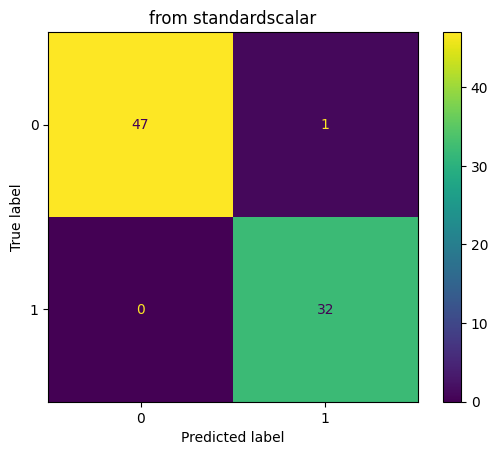

In [17]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("from standardscalar")

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.97      1.00      0.98        32

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [19]:
print(accuracy_score(y_test,y_pred))

0.9875
